In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
import tensorflow as tf
import pandas as pd

In [2]:
#Dataset

fifa17 = pd.read_csv("datasets/regression/CLEAN_FIFA17_official_data.csv")
fifa18 = pd.read_csv("datasets/regression/CLEAN_FIFA18_official_data.csv")
fifa19 = pd.read_csv("datasets/regression/CLEAN_FIFA19_official_data.csv")
fifa20 = pd.read_csv("datasets/regression/CLEAN_FIFA20_official_data.csv")
fifa21 = pd.read_csv("datasets/regression/CLEAN_FIFA21_official_data.csv")
fifa22 = pd.read_csv("datasets/regression/CLEAN_FIFA22_official_data.csv")

# Adicionar a Coluna "Year" ao dataset
  
fifa17["Year"] = 2017
fifa18["Year"] = 2018
fifa19["Year"] = 2019
fifa20["Year"] = 2020
fifa21["Year"] = 2021
fifa22["Year"] = 2022

df = pd.concat([fifa17,fifa18,fifa19,fifa20,fifa21,fifa22])
df = df.sample(frac=0.2, random_state=42)
# df = fifa17

df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Year_Joined,Year,Release Clause(£),DefensiveAwareness
14848,14848,228250,H. Al Ruwaili,23,https://cdn.sofifa.com/players/228/250/19_60.png,Saudi Arabia,https://cdn.sofifa.com/flags/sa.png,55,62,Al Taawoun,...,11.0,13.0,9.0,14.0,RB,54.0,2018,2019,185000.0,NaN
1525,1525,198118,J. Guilavogui,29,https://cdn.sofifa.com/players/198/118/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,78,78,VfL Wolfsburg,...,8.0,14.0,10.0,15.0,CB,80.0,2016,2021,15300000.0,81.0
13179,13179,234671,J. Odgaard,17,https://cdn.sofifa.com/players/234/671/17_60.png,Denmark,https://cdn.sofifa.com/flags/dk.png,58,78,Lyngby BK,...,13.0,13.0,8.0,11.0,ST,57.0,2015,2017,NaN,NaN
12858,12858,247322,T. Schmitt,21,https://cdn.sofifa.com/players/247/322/19_60.png,United States,https://cdn.sofifa.com/flags/us.png,57,68,Real Salt Lake,...,10.0,5.0,14.0,7.0,ST,57.0,2019,2019,306000.0,NaN
8579,8579,51620,C. Varrault,36,https://cdn.sofifa.com/players/051/620/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,70,70,Dijon FCO,...,11.0,9.0,6.0,7.0,CB,69.0,2011,2017,NaN,NaN


In [3]:
X = df.drop(columns=["Overall"], axis=1)
y = df["Overall"]

In [4]:
#TRATAMENTO DOS DADOS

# Ver a taxa de correlação entre Overall e os outros atributos

corr_overall = df.corr(numeric_only=True)['Overall'].sort_values(ascending=False)
top_20 = corr_overall.nlargest(21).drop(["Overall"])
excluir_features = ["Best Overall Rating","Potential","Value(£)","Wage(£)","Release Clause(£)","International Reputation"]

# Pegar as colunas das features mais correlacionandas ao nosso objetivo

features_ideais = []
for feature in top_20.index:
    if feature not in excluir_features:
        features_ideais.append(feature)

        

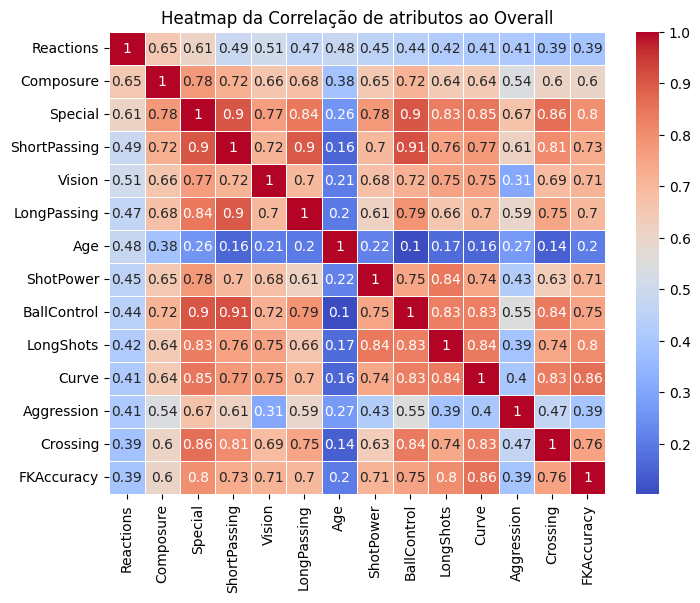

In [5]:
"""
Então fazendos um heatmap para ver se as features estão bem correlacionadas entre sí 
"""
import matplotlib.pyplot as plt
import seaborn as sns


# Colocamos o feature "Overall" devolta na nossas features para podermos fazer o heatmap
selected_attributes_overall=features_ideais
selected_attributes_overall_test = features_ideais+["ID"]
selected_attributes_overall_corr = df[selected_attributes_overall].corr()

# E Por fim plotamos o heatmap para os atributos relacionados com "Overall"
plt.figure(figsize=(8, 6))
sns.heatmap(selected_attributes_overall_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap da Correlação de atributos ao Overall')
plt.show()

In [6]:
X_ima = X[selected_attributes_overall_test]
X = X[selected_attributes_overall]

In [7]:
X

,Reactions,Composure,Special,ShortPassing,Vision,LongPassing,Age,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
14848,50.0,45.0,1371,46.0,37.0,30.0,23,39.0,45.0,20.0,21.0,47.0,46.0,40.0
1525,78.0,75.0,1946,76.0,65.0,75.0,29,78.0,72.0,66.0,42.0,80.0,52.0,53.0
13179,54.0,52.0,1452,56.0,50.0,38.0,17,59.0,58.0,49.0,47.0,39.0,42.0,34.0
12858,47.0,49.0,1489,53.0,51.0,36.0,21,68.0,59.0,54.0,49.0,56.0,50.0,43.0
8579,66.0,61.0,1640,66.0,41.0,64.0,36,65.0,51.0,57.0,68.0,76.0,60.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,56.0,52.0,1539,60.0,55.0,57.0,21,59.0,56.0,40.0,41.0,54.0,37.0,36.0
2562,68.0,70.0,1877,77.0,74.0,76.0,27,74.0,77.0,74.0,76.0,58.0,77.0,76.0
11772,65.0,55.0,1512,65.0,57.0,54.0,20,34.0,56.0,23.0,44.0,45.0,63.0,29.0
2105,65.0,70.0,1896,73.0,70.0,70.0,29,74.0,74.0,73.0,74.0,68.0,68.0,70.0


In [8]:
y

14848    55
1525     78
13179    58
12858    57
8579     70
         ..
11511    57
2562     73
11772    65
2105     70
4582     66
Name: Overall, Length: 20870, dtype: int64

In [9]:
# Load the Boston Housing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_ima, X_test_ima, y_train_ima, y_test_ima = train_test_split(X_ima, y, test_size=0.3, random_state=42)

In [10]:
X_train

,Reactions,Composure,Special,ShortPassing,Vision,LongPassing,Age,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
11845,55.0,64.0,1557,58.0,48.0,59.0,28,61.0,57.0,57.0,48.0,54.0,61.0,45.0
13444,60.0,44.0,1476,60.0,38.0,40.0,20,40.0,59.0,38.0,29.0,49.0,63.0,44.0
7329,59.0,62.0,1687,64.0,49.0,59.0,27,55.0,61.0,55.0,31.0,58.0,67.0,31.0
3095,63.0,59.0,1836,68.0,45.0,58.0,24,65.0,74.0,68.0,65.0,64.0,74.0,71.0
11382,58.0,63.0,1553,56.0,37.0,54.0,32,62.0,61.0,59.0,49.0,30.0,32.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7701,60.0,54.0,1669,56.0,53.0,54.0,24,50.0,62.0,34.0,45.0,63.0,58.0,30.0
10321,63.0,48.0,1589,59.0,42.0,45.0,26,56.0,49.0,52.0,58.0,48.0,61.0,64.0
17155,60.0,26.0,1018,33.0,28.0,25.0,20,21.0,16.0,14.0,18.0,25.0,19.0,19.0
10,81.0,83.0,2262,84.0,79.0,83.0,26,85.0,79.0,81.0,77.0,88.0,71.0,64.0


In [11]:
X_test

,Reactions,Composure,Special,ShortPassing,Vision,LongPassing,Age,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
1970,64.0,63.0,1919,71.0,70.0,68.0,25,72.0,74.0,65.0,66.0,57.0,73.0,69.0
9122,63.0,50.0,1627,64.0,55.0,60.0,28,61.0,65.0,20.0,55.0,71.0,48.0,43.0
2185,70.0,69.0,1881,60.0,57.0,53.0,22,78.0,68.0,74.0,58.0,60.0,56.0,62.0
1208,78.0,73.0,1969,77.0,74.0,73.0,32,75.0,72.0,70.0,67.0,77.0,66.0,67.0
9348,48.0,54.0,1620,55.0,55.0,49.0,23,71.0,50.0,37.0,33.0,63.0,47.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11388,51.0,46.0,1546,58.0,48.0,56.0,24,33.0,60.0,31.0,32.0,53.0,64.0,28.0
15377,46.0,42.0,1265,33.0,30.0,25.0,34,37.0,26.0,19.0,28.0,90.0,20.0,27.0
13319,46.0,42.0,1458,49.0,51.0,44.0,19,58.0,56.0,46.0,46.0,34.0,49.0,30.0
2432,62.0,64.0,1877,69.0,63.0,67.0,32,74.0,68.0,70.0,70.0,68.0,61.0,64.0


In [12]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Build the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [14]:
model.compile(loss="mean_squared_error",
              optimizer='adam',
              metrics=["mse"])

In [15]:
#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.4, verbose=1,)


Epoch 1/100
274/274 [==============================] - 7s 15ms/step - loss: 44.9578 - mse: 44.9578 - val_loss: 13.6630 - val_mse: 13.6630
Epoch 2/100
274/274 [==============================] - 3s 11ms/step - loss: 13.2114 - mse: 13.2114 - val_loss: 9.9203 - val_mse: 9.9203
Epoch 3/100
274/274 [==============================] - 3s 11ms/step - loss: 13.0295 - mse: 13.0295 - val_loss: 25.1043 - val_mse: 25.1043
Epoch 4/100
274/274 [==============================] - 3s 12ms/step - loss: 13.1507 - mse: 13.1507 - val_loss: 15.3691 - val_mse: 15.3691
Epoch 5/100
274/274 [==============================] - 3s 11ms/step - loss: 11.2341 - mse: 11.2341 - val_loss: 7.9236 - val_mse: 7.9236
Epoch 6/100
274/274 [==============================] - 3s 12ms/step - loss: 10.4466 - mse: 10.4466 - val_loss: 20.7206 - val_mse: 20.7206
Epoch 7/100
274/274 [==============================] - 3s 11ms/step - loss: 10.5545 - mse: 10.5545 - val_loss: 7.6689 - val_mse: 7.6689
Epoch 8/100
274/274 [===================

In [16]:

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error: {mse}")

196/196 [==============================] - 1s 5ms/step - loss: 3861.9929 - mse: 3861.9929
Mean Squared Error: [3861.992919921875, 3861.992919921875]


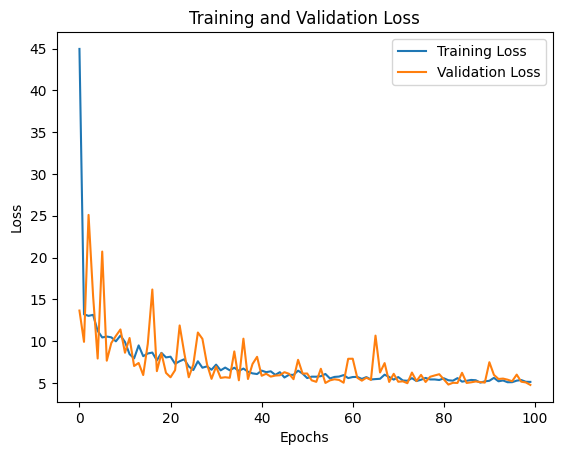

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
X_new = X_test[5:10]
y_preds = model.predict(X_new)
y_preds.round(2)

1/1 [==============================] - 0s 280ms/step


array([[72.71],
       [76.04],
       [84.64],
       [67.93],
       [73.99]], dtype=float32)

In [19]:
X_new

,Reactions,Composure,Special,ShortPassing,Vision,LongPassing,Age,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
1835,76.0,57.0,1934,67.0,65.0,68.0,32,76.0,73.0,67.0,60.0,85.0,70.0,49.0
1660,80.0,68.0,1924,75.0,69.0,68.0,32,75.0,78.0,66.0,53.0,73.0,66.0,50.0
84,80.0,85.0,2170,92.0,89.0,90.0,31,81.0,86.0,88.0,88.0,58.0,86.0,93.0
12423,61.0,63.0,1503,50.0,36.0,29.0,27,69.0,65.0,56.0,32.0,53.0,30.0,27.0
1293,76.0,73.0,1970,74.0,68.0,70.0,21,68.0,75.0,61.0,63.0,79.0,53.0,51.0


In [20]:
X_test_ima[5:10]

,Reactions,Composure,Special,ShortPassing,Vision,LongPassing,Age,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy,ID
1835,76.0,57.0,1934,67.0,65.0,68.0,32,76.0,73.0,67.0,60.0,85.0,70.0,49.0,219470
1660,80.0,68.0,1924,75.0,69.0,68.0,32,75.0,78.0,66.0,53.0,73.0,66.0,50.0,194365
84,80.0,85.0,2170,92.0,89.0,90.0,31,81.0,86.0,88.0,88.0,58.0,86.0,93.0,189513
12423,61.0,63.0,1503,50.0,36.0,29.0,27,69.0,65.0,56.0,32.0,53.0,30.0,27.0,216387
1293,76.0,73.0,1970,74.0,68.0,70.0,21,68.0,75.0,61.0,63.0,79.0,53.0,51.0,246764


In [21]:
y_test[5:10]

1835     71
1660     74
84       85
12423    64
1293     74
Name: Overall, dtype: int64